In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from paths import Paths

In [37]:
df = pd.read_csv(f'{Paths.RESULTS}/demo_and_features.csv')
df['rel_std'] = df['std'] / df['mean']
df['rel_std'] = df['rel_std'].fillna(0)
df['rel_std'] = df['rel_std'].replace([np.inf, -np.inf], 0)
df['rel_std'] = df['rel_std'].round(2)

In [3]:
emp_df = pd.read_csv(f'{Paths.RESULTS}/full_emp_features.csv', index_col='pid')

<Axes: xlabel='rel_std', ylabel='ALFF_CORR'>

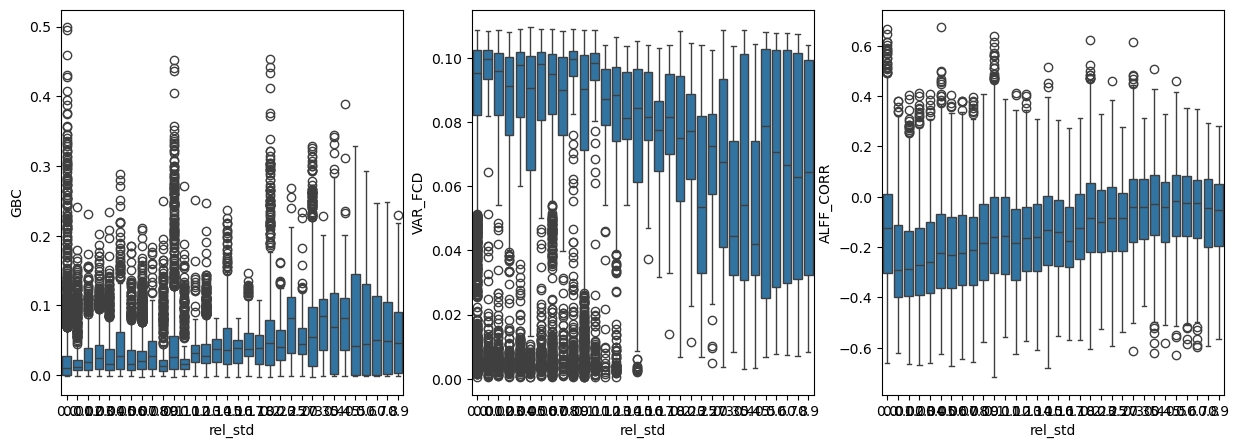

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(data=df, x='rel_std', y='GBC', ax=axes[0])
sns.boxplot(data=df, x='rel_std', y='VAR_FCD', ax=axes[1])
sns.boxplot(data=df, x='rel_std', y='ALFF_CORR', ax=axes[2])

<Axes: xlabel='std', ylabel='ALFF_CORR'>

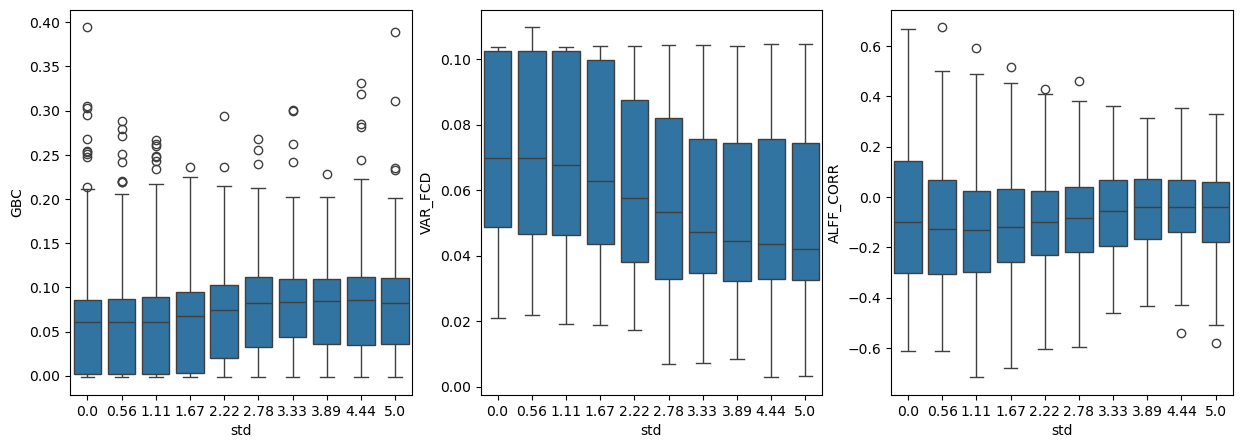

In [ ]:
healthy = df[df['mean']==11.11]
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(data=healthy, x='std', y='GBC', ax=axes[0])
sns.boxplot(data=healthy, x='std', y='VAR_FCD', ax=axes[1])
sns.boxplot(data=healthy, x='std', y='ALFF_CORR', ax=axes[2])

In [51]:
np.unique(healthy['std'])

array([0.  , 0.56, 1.11, 1.67, 2.22, 2.78, 3.33, 3.89, 4.44, 5.  ])

<Axes: xlabel='we', ylabel='ALFF_CORR'>

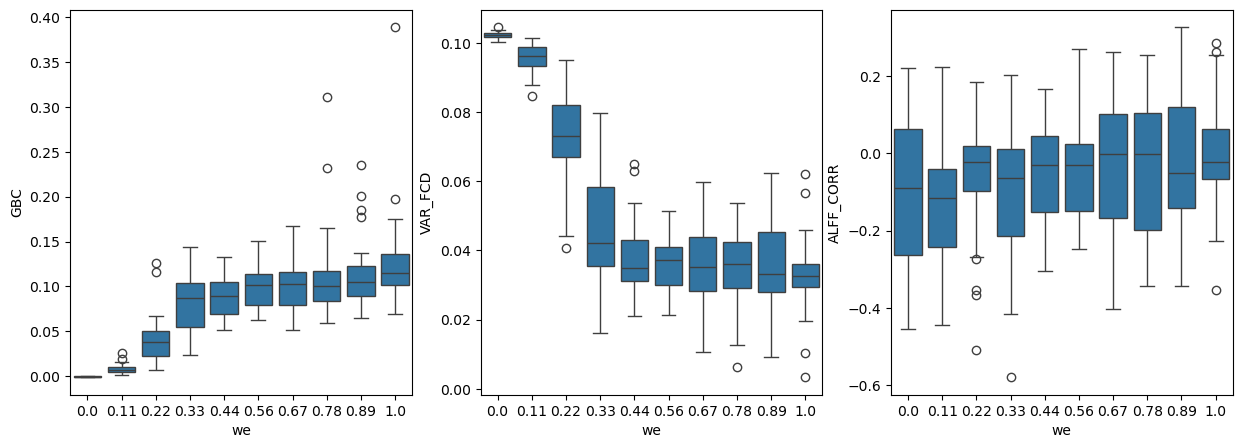

In [57]:
healthy = df[df['mean']==11.11]
healthy = healthy[healthy['std']==5.]
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(data=healthy, x='we', y='GBC', ax=axes[0])
sns.boxplot(data=healthy, x='we', y='VAR_FCD', ax=axes[1])
sns.boxplot(data=healthy, x='we', y='ALFF_CORR', ax=axes[2])

In [5]:
def find_closest_simulation(df, col1, col2, emp_val1, emp_val2):

    dist = np.sqrt((df[col1] - emp_val1)**2 + (df[col2] - emp_val2)**2)

    best_idx = dist.idxmin()
    sim1 = df.loc[best_idx, col1]
    sim2 = df.loc[best_idx, col2]

    err1 = abs(sim1 - emp_val1) / ((abs(sim1) + abs(emp_val1)) / 2)
    err2 = abs(sim2 - emp_val2) / ((abs(sim2) + abs(emp_val2)) / 2)

    return df.loc[[best_idx]], err1, err2 

In [6]:
best = []
for pid in np.unique(df['pid']):
    tempdf = df[df['pid']==pid]
    emp_gbc = emp_df.loc[pid, 'GBC']
    emp_var_fcd = emp_df.loc[pid, 'VAR_FCD']
    best_idx, e1, e2 = find_closest_simulation(df, 'GBC', 'VAR_FCD', emp_gbc, emp_var_fcd)
    best.append(best_idx)

best_df = pd.concat(best)
    


In [7]:
bestC = []
for pid in np.unique(df['pid']):
    tempdf = df[df['pid']==pid]
    max_alff_corr = np.max(tempdf['ALFF_CORR'])
    bestC.append(tempdf[tempdf['ALFF_CORR']==max_alff_corr])

bestC_df = pd.concat(bestC)

Text(0.5, 1.0, 'we=0.')

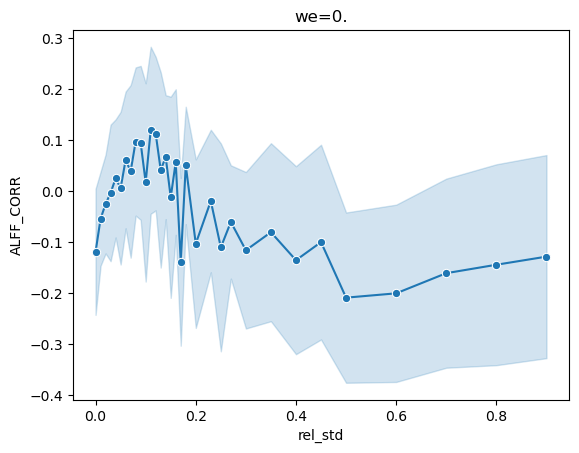

In [86]:
seldf = df[df['we']==0.0]
sns.lineplot(
    data=seldf,
    x='rel_std',
    y='ALFF_CORR',
    estimator='mean',     
    errorbar='sd',         
    marker='o'
)

plt.title('we=0.')

<Axes: xlabel='std', ylabel='ALFF_CORR'>

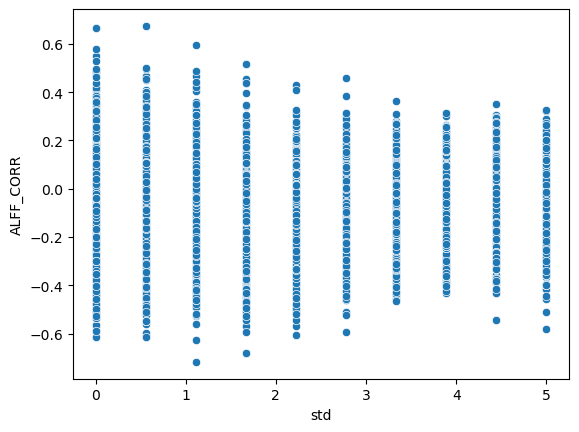

In [69]:
sns.scatterplot(seldf, y='ALFF_CORR', x='std')

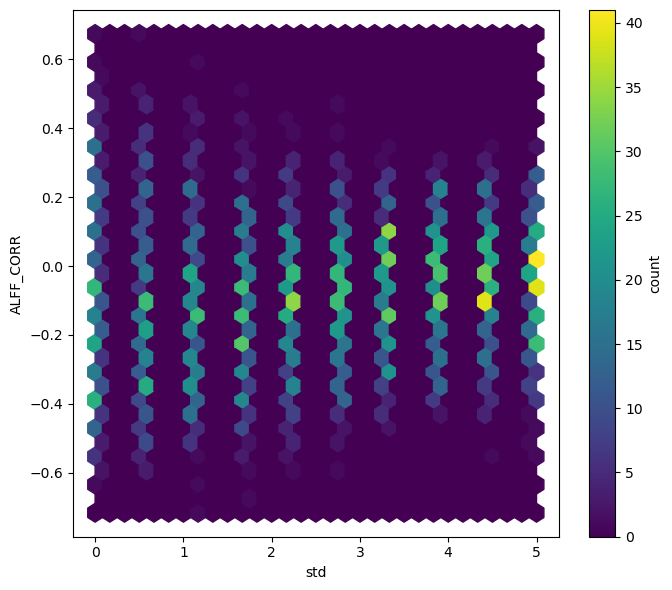

In [63]:
plt.figure(figsize=(7,6))
seldf = df[df['mean']==11.11]
plt.hexbin(
    seldf['std'],
    seldf['ALFF_CORR'],
    gridsize=30
)

plt.colorbar(label='count')
plt.xlabel('std')
plt.ylabel('ALFF_CORR')
plt.tight_layout()
plt.show()


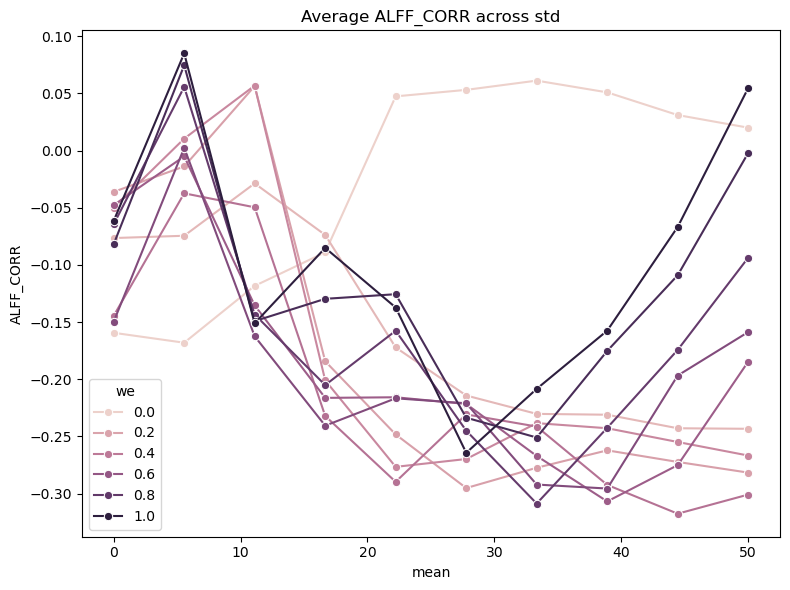

<bound method Figure.savefig of <Figure size 800x600 with 1 Axes>>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# compute average across std (and subjects if present)
avg_df = (
    df
    .groupby(['we', 'mean'])['ALFF_CORR']
    .mean()
    .reset_index()
)

fig = plt.figure(figsize=(8,6))

sns.lineplot(
    data=avg_df,
    x='mean',
    y='ALFF_CORR',
    hue='we',
    marker='o'
)

plt.title('Average ALFF_CORR across std')
plt.tight_layout()
plt.show()

fig.savefig

In [108]:
df['rel_std'] = df['std'] / df['mean']

In [123]:
from paths import Paths

In [45]:
df['rel_std_sq'] = df['rel_std']**2

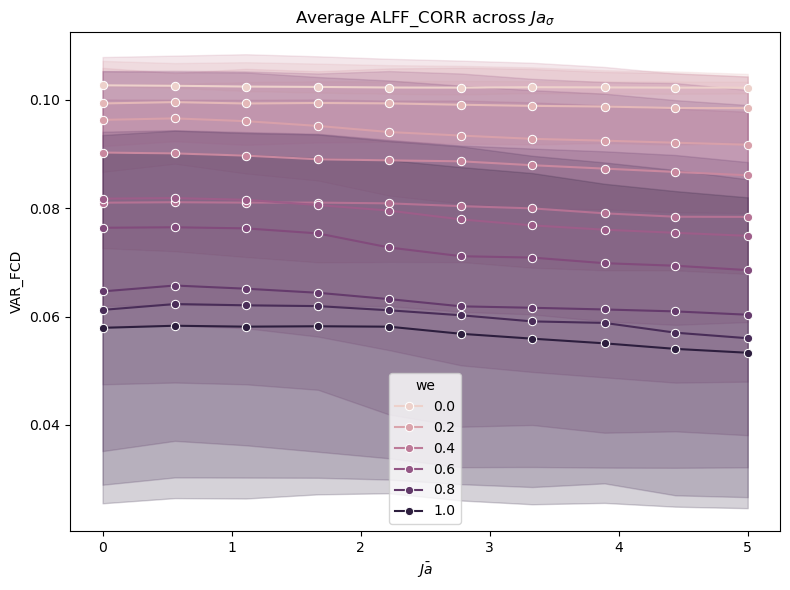

In [73]:
plt.figure(figsize=(8,6))

y = 'VAR_FCD'

sns.lineplot(
    data=df,
    x='std',
    y=y,
    hue='we',
    estimator='mean',      # average across std
    errorbar='sd',         # spread across std
    marker='o'
)

plt.title(r'Average ALFF_CORR across $Ja_{\sigma}$')
plt.xlabel(r'$\bar{Ja}$')
plt.tight_layout()
#plt.savefig(f'{Paths.FIGURES}/averaged_{y}_corr.png', dpi=300)
plt.show()


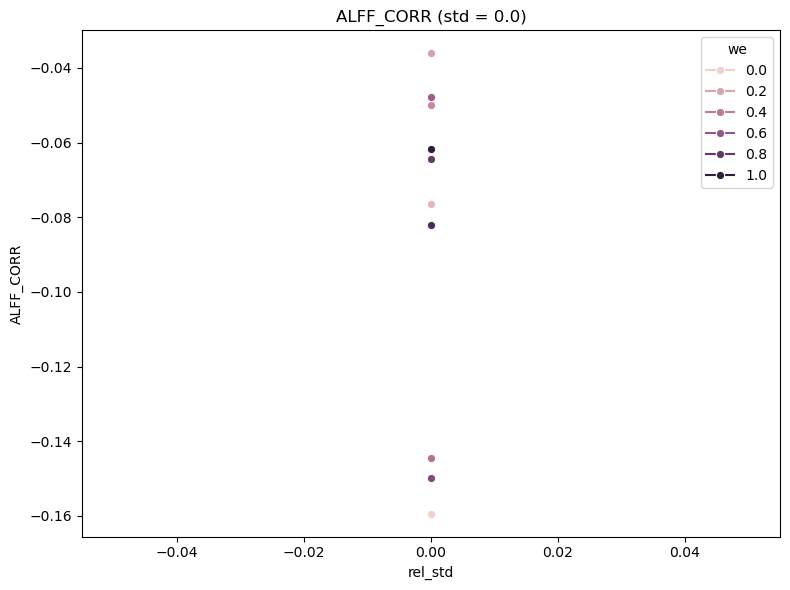

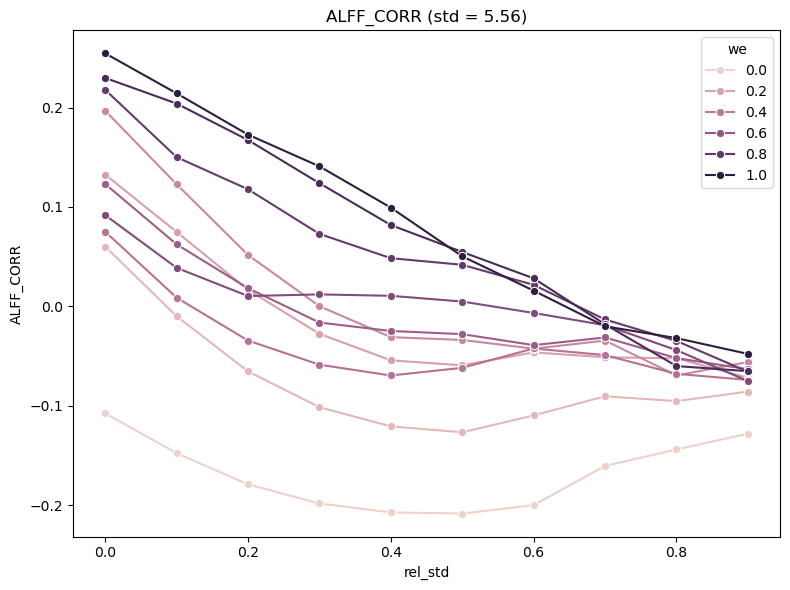

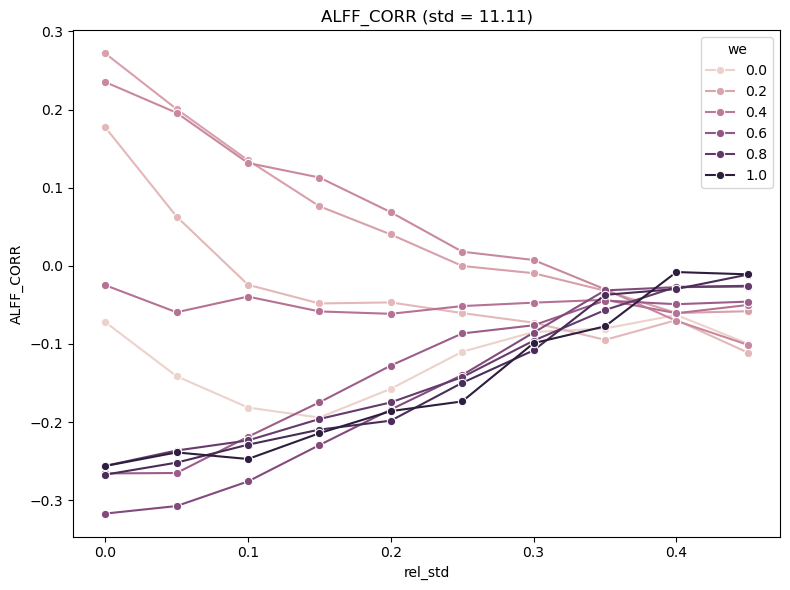

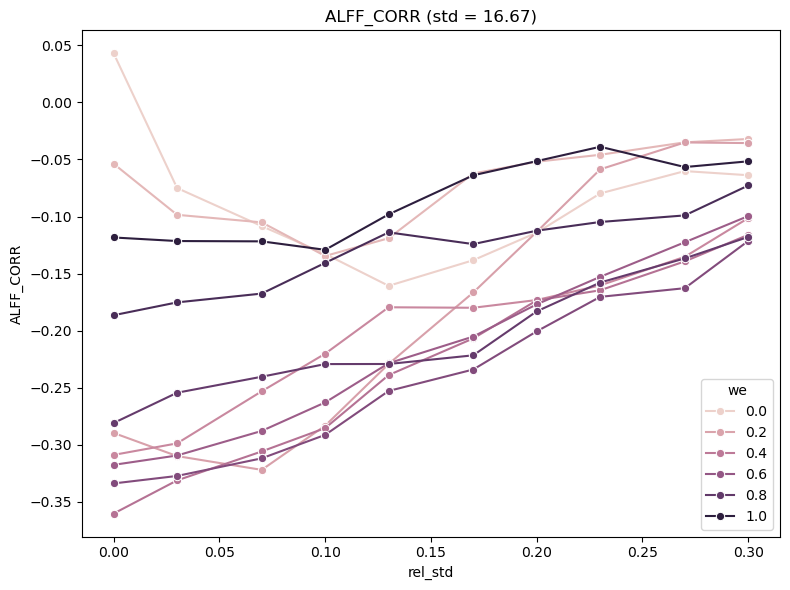

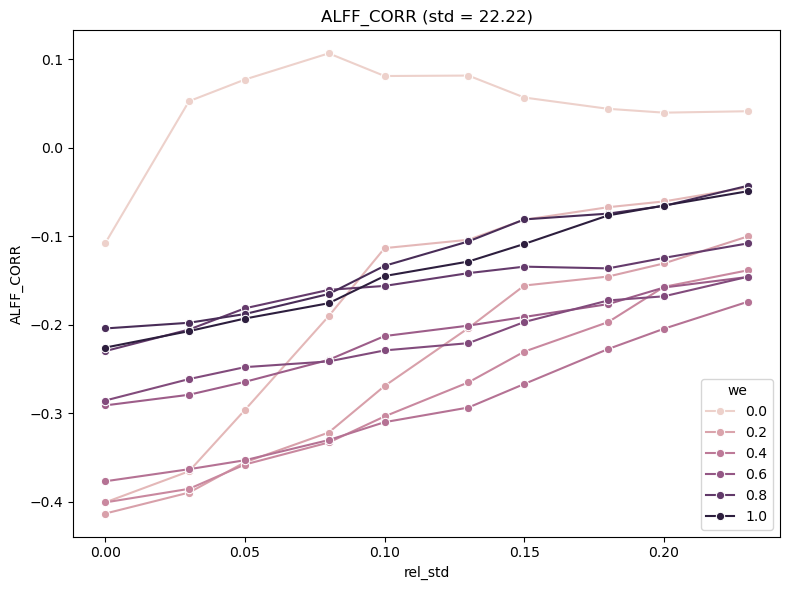

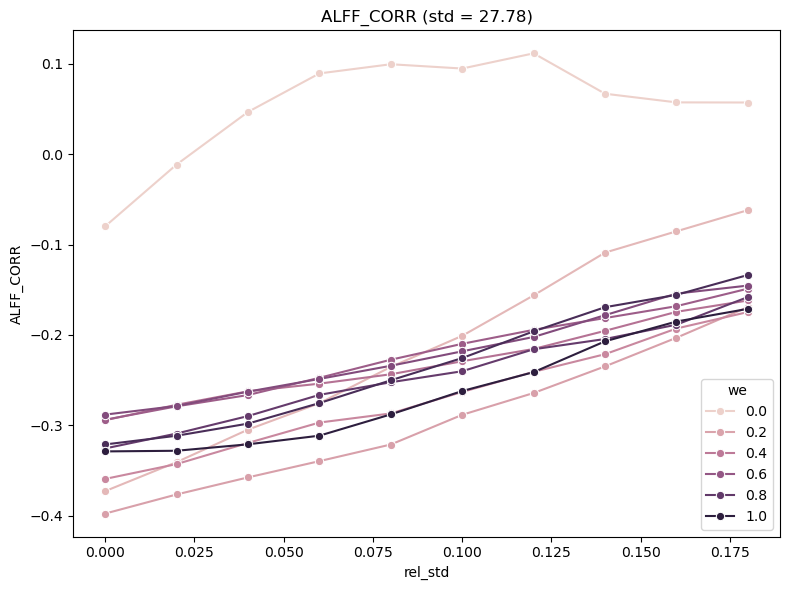

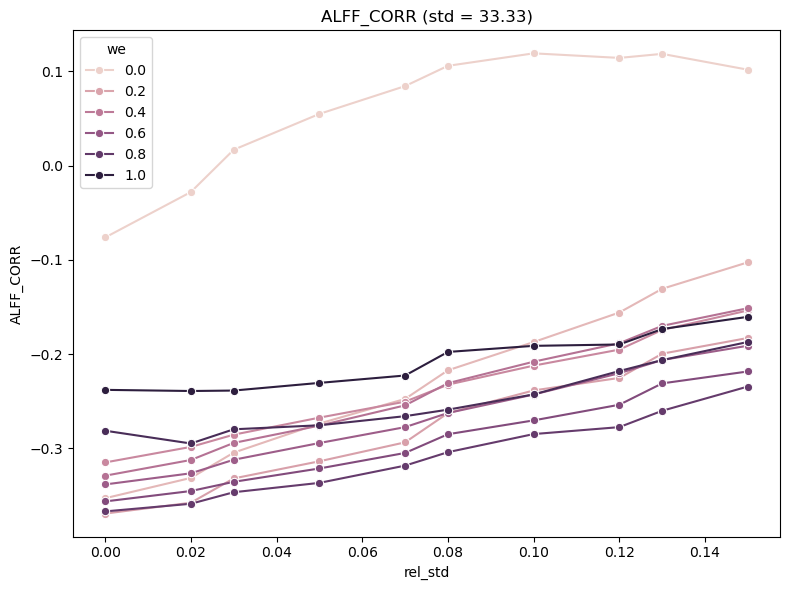

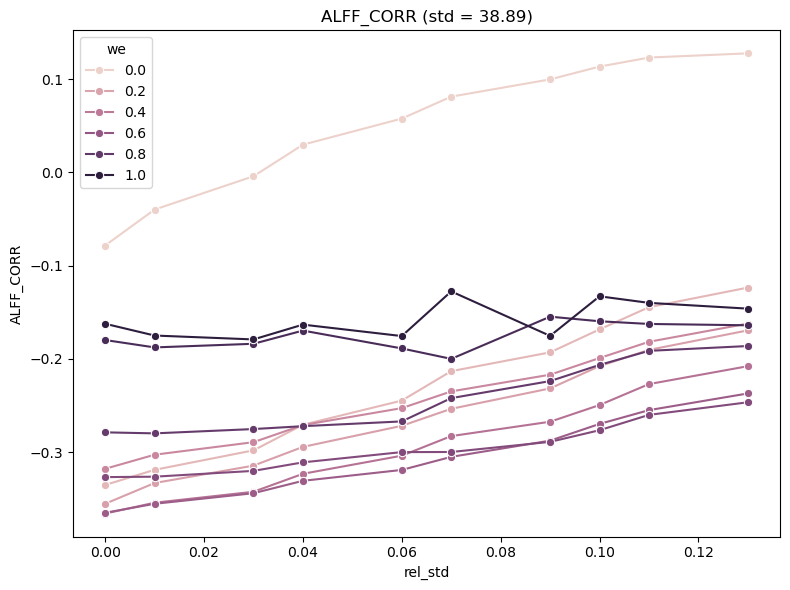

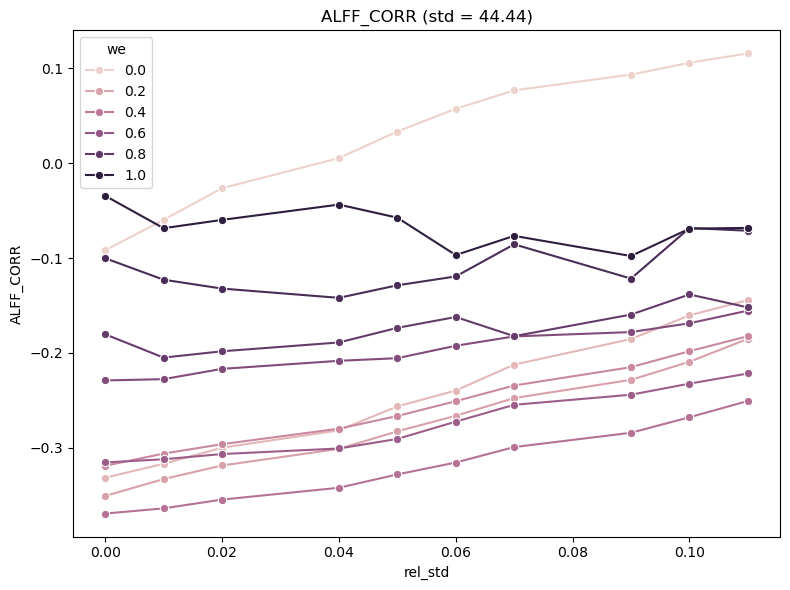

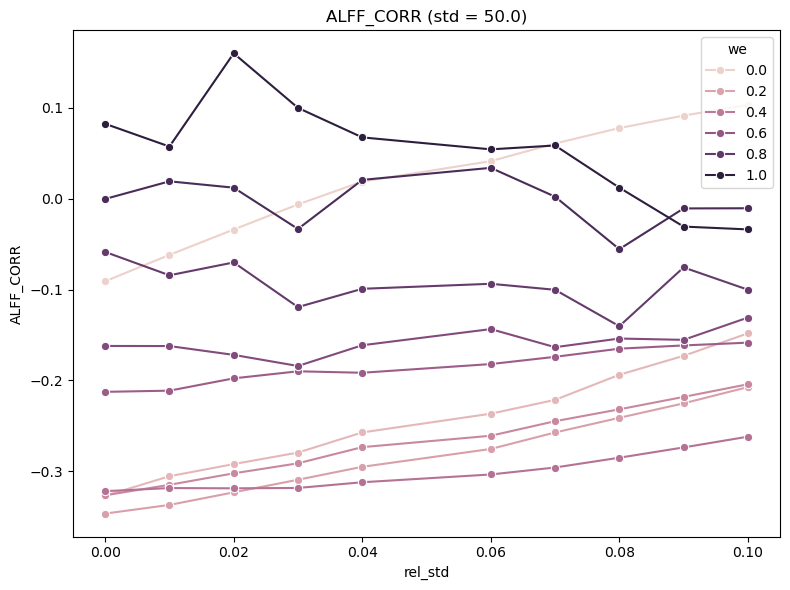

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for mean in np.unique(df['mean']):

    temp = df[df['mean'] == mean]

    avg_df = (
        temp
        .groupby(['we', 'rel_std'])['ALFF_CORR']
        .mean()
        .reset_index()
    )

    plt.figure(figsize=(8,6))

    sns.lineplot(
        data=avg_df,
        x='rel_std',
        y='ALFF_CORR',
        hue='we',
        marker='o'
    )

    plt.title(f'ALFF_CORR (std = {mean})')
    plt.tight_layout()
    plt.show()
